# DryBeanML

## Data

In [ ]:
!pip install ydata_profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b6c250d26f12b7eb43beeaceab90baf91b76d750eff4f4cf8b4c60157d29a09f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import seaborn as sns

import ydata_profiling
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score, confusion_matrix
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

from collections import Counter

import pandas as pd

In [ ]:
# Dataset metin bilgisini okuma
data_url = "https://github.com/AysenurYrr/ML-Lab/raw/refs/heads/main/DryBeanDataset/Dry_Bean_Dataset.xlsx"

# Dataseti çekme ve okuma
data = pd.read_excel(data_url)
print(data.shape)
data.head()


(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Dataset Hakkında

Data Set Name:
Dry Bean Dataset

Abstract:
7 farklı kayıtlı kuru fasulye türüne ait 13.611 tane tanelerin görüntüleri yüksek çözünürlüklü bir kamera ile çekilmiştir. Toplamda 16 özellik; 12 boyut ve 4 şekil formu, bu tanelerden elde edilmiştir.

Source:
Murat KOKLU
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-2737-2360
mkoklu@selcuk.edu.tr

Ilker Ali OZKAN
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-5715-1040
ilkerozkan@selcuk.edu.tr

Data Type:
Multivariate

Task:
Classification

Attribute Type:
Categorical
Integer
Real

Area:
CS / Engineering

Format Type:
Matrix

Does your data set contain missing values?
No

Number of Instances (records in your data set):
13611

Number of Attributes (fields within each record):
17

Relevant Information:
> Bu araştırmada, piyasa koşulları göz önünde bulundurularak form, şekil, tür ve yapı gibi özellikler dikkate alınarak yedi farklı kuru fasulye türü kullanılmıştır. Benzer özelliklere sahip yedi farklı kayıtlı kuru fasulye türünü ayırt etmek ve homojen tohum sınıflandırması elde etmek amacıyla bir bilgisayarlı görü sistemi geliştirilmiştir. Sınıflandırma modeli için, yedi farklı kuru fasulye türüne ait 13.611 tane tanelerin görüntüleri yüksek çözünürlüklü bir kamera ile çekilmiştir. Bilgisayarlı görü sistemi ile elde edilen fasulye görüntüleri segmentasyon ve özellik çıkarma aşamalarına tabi tutulmuş ve toplamda 16 özellik; 12 boyut ve 4 şekil formu tanelerden elde edilmiştir.

Attribute Information:
1. Area (A): Alan Bir fasulye bölgesinin alanı ve sınırları içindeki piksel sayısı.
2. Perimeter (P): Çevre Fasulyenin çevresi, sınırının uzunluğu olarak tanımlanır.
3. Major axis length (L): Büyük eksen uzunluğu (L): Bir fasulyeden çizilebilecek en uzun çizginin uçları arasındaki mesafe.
4. Minor axis length (l): Küçük eksen uzunluğu (l): Ana eksene dik dururken fasulyeden çizilebilecek en uzun çizgi.
5. Aspect ratio (K): En-boy oranı (K): L ve l arasındaki ilişkiyi tanımlar.
6. Eccentricity (Ec): Eksantriklik (Ec): Aynı momentlere sahip elipsin eksantrikliği.
7. Convex area (C): Konveks alan (C): Fasulye tohumunun alanını içerebilecek en küçük konveks çokgen içindeki piksel sayısı.
8. Equivalent diameter (Ed): Eşdeğer çap (Ed): Alanı bir fasulye tohumu alanı ile aynı olan bir çemberin çapı.
9. Extent (Ex): Kapsam (Ex): Sınır kutusundaki piksellerin fasulye alanına oranı.
10. Solidity (S): Yoğunluk (S): Konvekslik olarak da bilinir. Konveks kabukta bulunan piksellerin fasulyelerde bulunanlara oranı.
11. Roundness (R): Roundness (R): Yuvarlaklık (R): Aşağıdaki formülle hesaplanır: (4πA) / (P²).
12. Compactness (CO): Kompaktlık (CO): Bir nesnenin yuvarlaklığını ölçer: Ed / L.
13. ShapeFactor1 (SF1) Şekil Faktörü 1 (SF1)
14. ShapeFactor2 Şekil Faktörü 2 (SF2)
15. ShapeFactor3 Şekil Faktörü 3 (SF3)
16. ShapeFactor4 Şekil Faktörü 4 (SF4)
17. Class  Sınıf: (Şeker, Barbunya, Bombay, Çalı, Dermosan, Horoz ve Sıra).



Relevant Papers:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Citation Requests / Acknowledgements:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

In [ ]:
# Genel bilgi
dataset_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# Benzersiz sınıf isimlerini kontrol etme
class_names = data['Class'].unique()
class_names

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

## EDA

Class hariç tüm sütunları feature_array içerisine alıyorum. Aynı zamanda aşağıdaki profile bölümüdne görüleceği üzere feature array tamamıyla continous numeric değerlerden oluşmaktadır.

In [ ]:
feature_array = data.columns[:-1]  # Class hariç tüm sütunlar

### Class Analizi

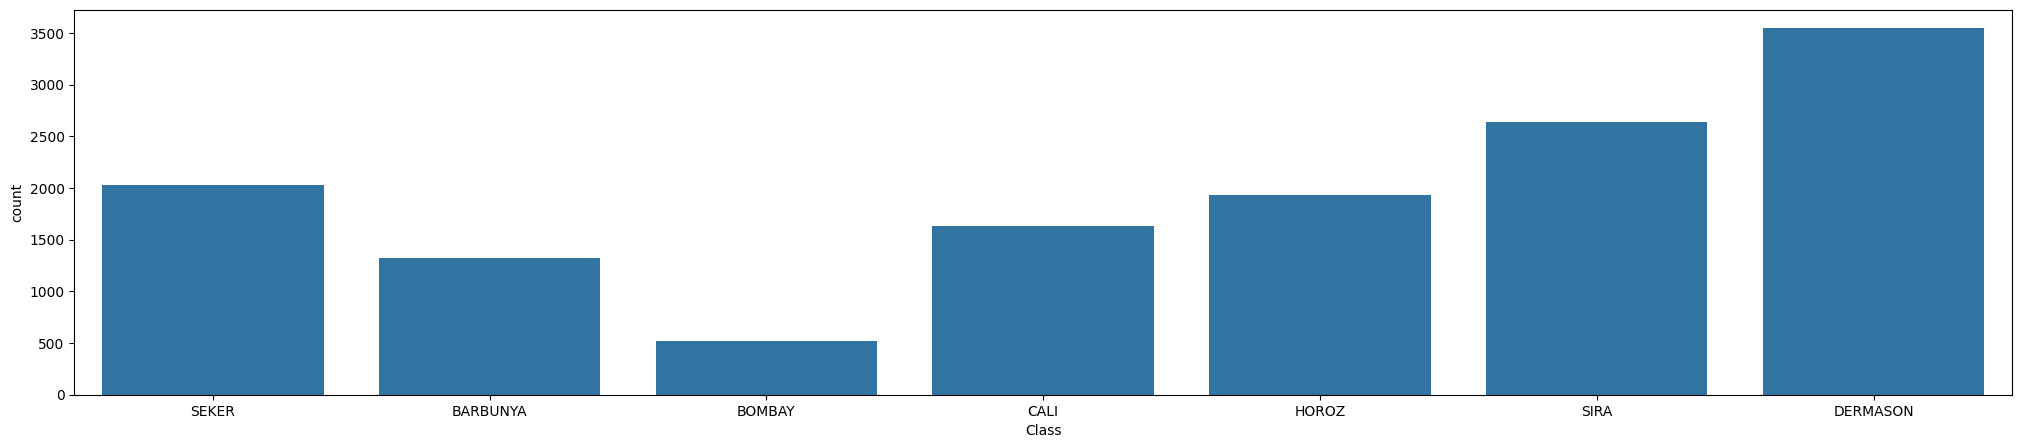

In [ ]:
plt.figure(figsize=(25, 5))
sns.countplot(x='Class', data=data)
plt.show()

Görüldüğü üzere 7 seçenekli (multi-class) ve dengesiz bir veri setine sahibiz. özellikle **Bombay** verisine ait çok az veri mevcut

### Tanımlayıcı İstatistikler (Descriptive Statistics)

Featurelarımın hepsi nümerik olduklarından dolayı nümerik öznitelikler için uygun olan betimleyici istatistikleri bu şekilde inceliyorum.

In [ ]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


---

pandas profilleri bize her bir özellik için continous mu categoical mı olduğunu verir. Bunların tanımlayıcı istatistikleri (Descriptive Statistics) üzerinden bize bir rapor oluşturur. Birbirleri ile korelasyonları hakkında bilgi sahibi oluruz. Featureların aralarındaki ilişkileri incelememizi ve görselleştirmemizde bize olanak tanır. Missing Value, Duplicate rows... görmemizi sağlar. Veri setim küçük olduğundan dolayı basitçe bu işlemleri pandas profillerini kullanarak sağlayabiliyorum. Büyük veri setlerinde bunu yapmak pandas profilleri zorlanırlar hatta 8GB bir veri setinde bile zorlaanmaya başlayacaktır. Elimdeki veri oldukça küçük olduğundan rahatlıkla bu yöntemi kullandım.

In [ ]:
profile = ydata_profiling.ProfileReport(data)
profile

* Dataset 68 tane duplicate veriye sahip. Tamamı ile aynı özelliklerde 68 satırımız var yani.
* Featurelar arasındaki korelasyonların oldukça yüksek olduğunu görüyorum. Birbirinden bağımsız olan featurelarım arasında da yüksek korelasyon olduğunu görüyorum. Bu bizi **multicolinearity** problemine sürükleyecektir.
* Yüksek multicollinearity durumunda, modelde kullanılan yönteme göre (tree, Lojistik Regresyon, SVM) farklı çeşit sorunlarla karşılaşabiliriz.

### Box Plot Analizi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Boxplot çizmek için fonksiyon
def plot_boxplot(data, feature, class_name):
    """
    Verilen bir özellik ve sınıf için boxplot çizer.

    Parameters:
        data: pandas.DataFrame
            Analiz yapılacak veri seti.
        feature: str
            Boxplot oluşturulacak özellik adı.
        class_name: str
            Belirli bir sınıfın adı.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Class'], y=data[feature], data=data)
    plt.title(f"Boxplot of {feature} for Class {class_name}", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Bombay class'ına ait çok az veri olduğunu hatırlıyoruz. Lakin boc plotları incelediğimde Bombay fasulyesi bazı feature'lar bakımından diğerlerinden oldukça ayrılıyor. Örneğin Area, Perimeter, MajorAxisLength, Minor AxisLength gibi featureları incelediğimizde diğer box pltlardan oldukça ayrı bir durumda olduğunu rahatlıkla görebilmekteyiz. Dolayısı ile model büyük ihtimalle Bombay fasulyesini az veriye sahip olmasına rağmen ayırmakta zorluk çekmeyecektir.

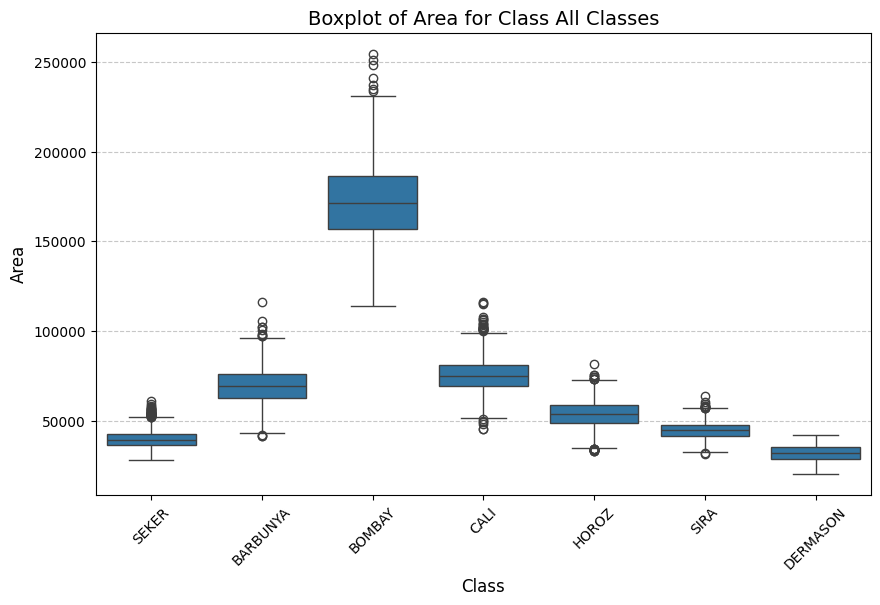

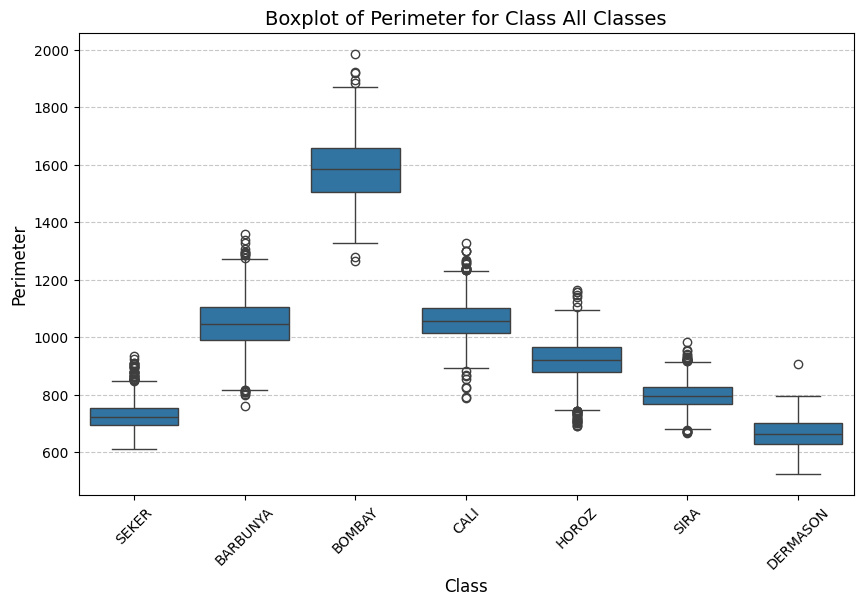

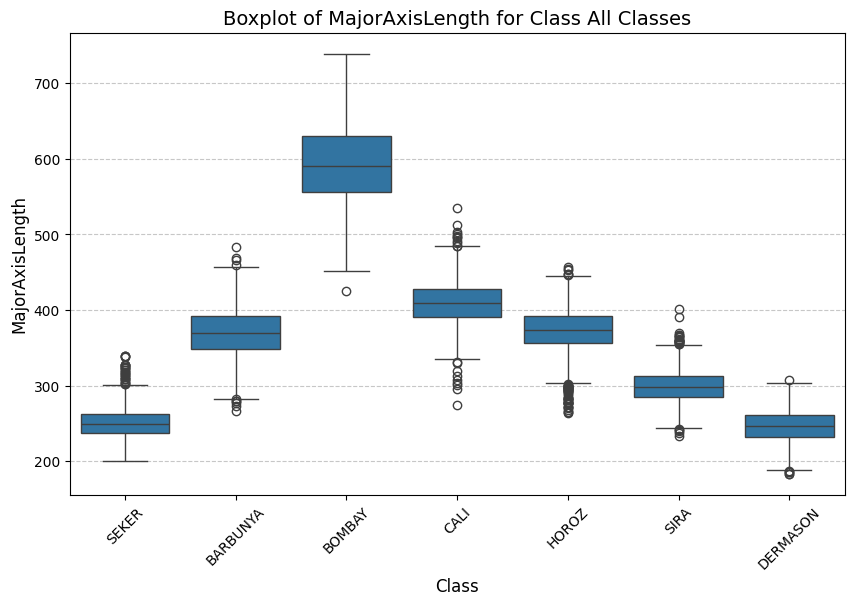

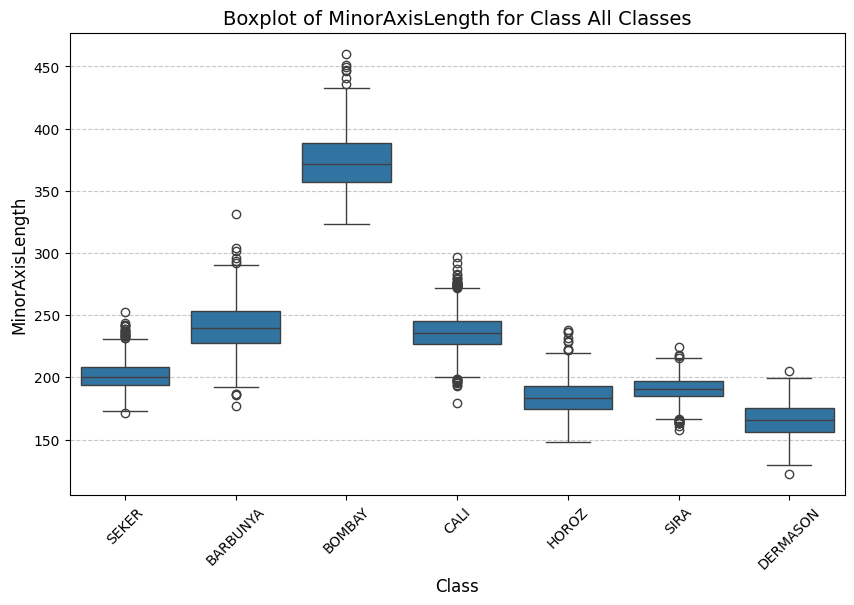

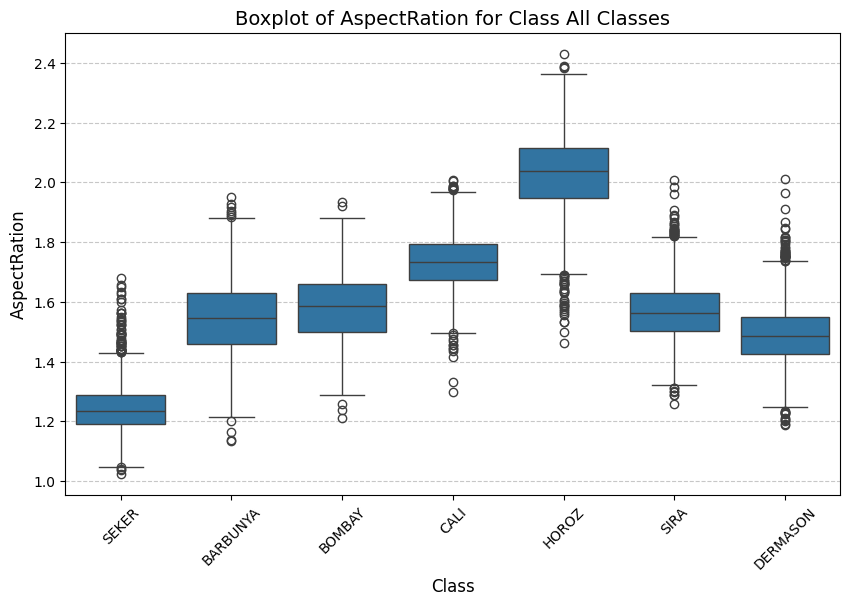

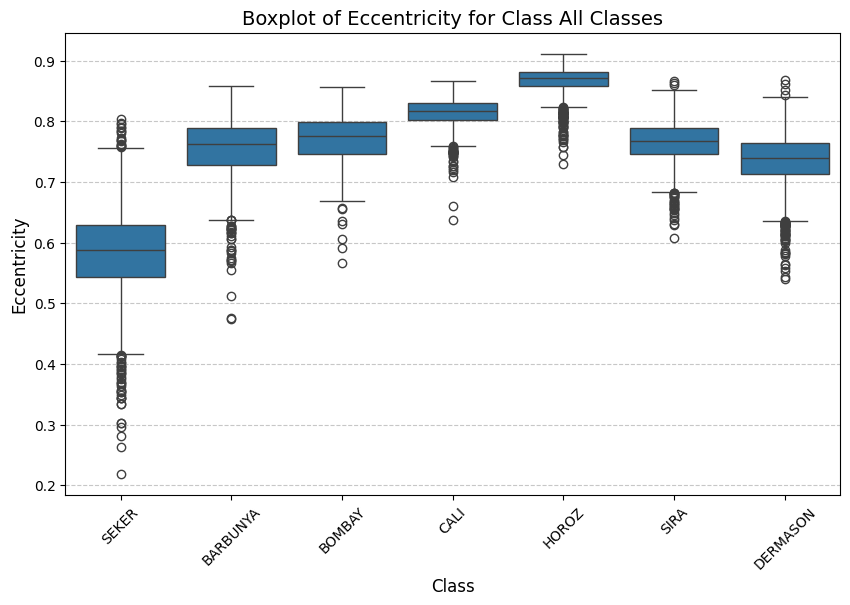

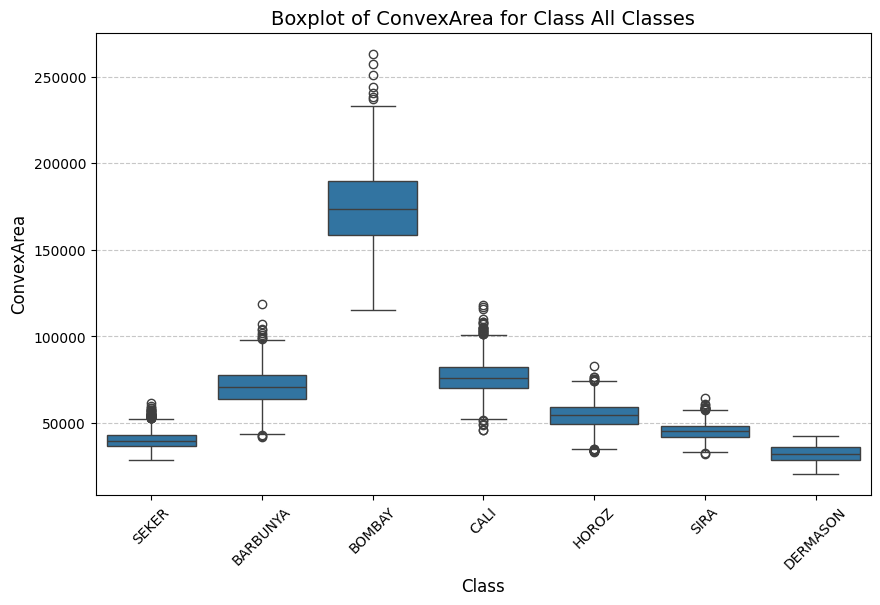

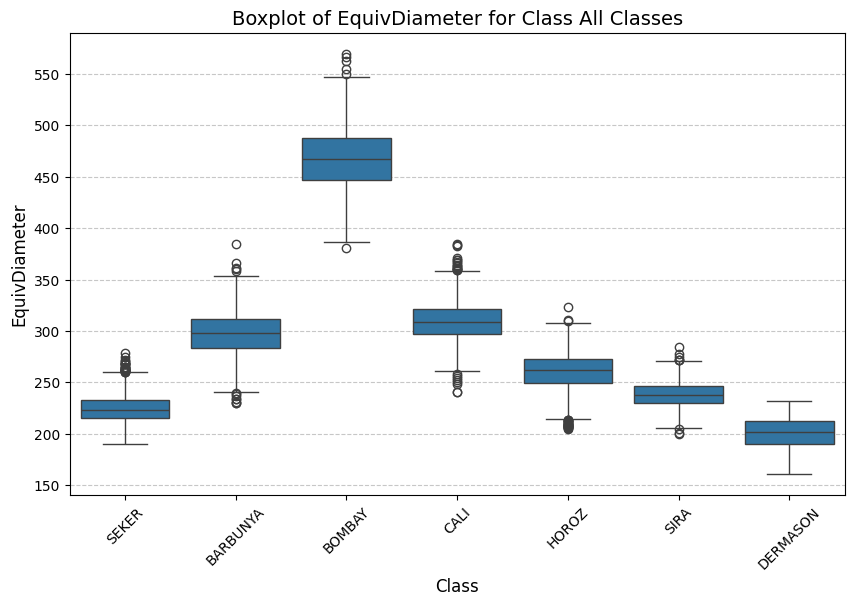

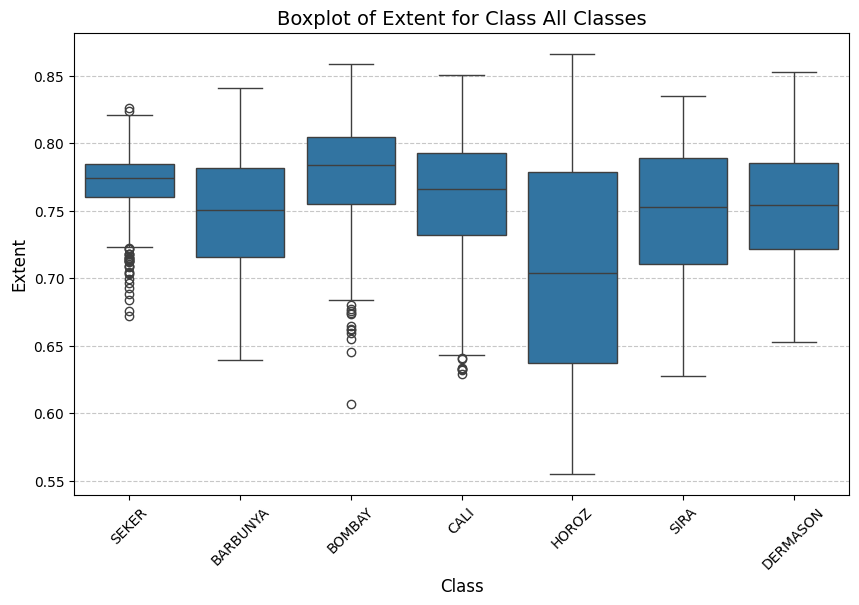

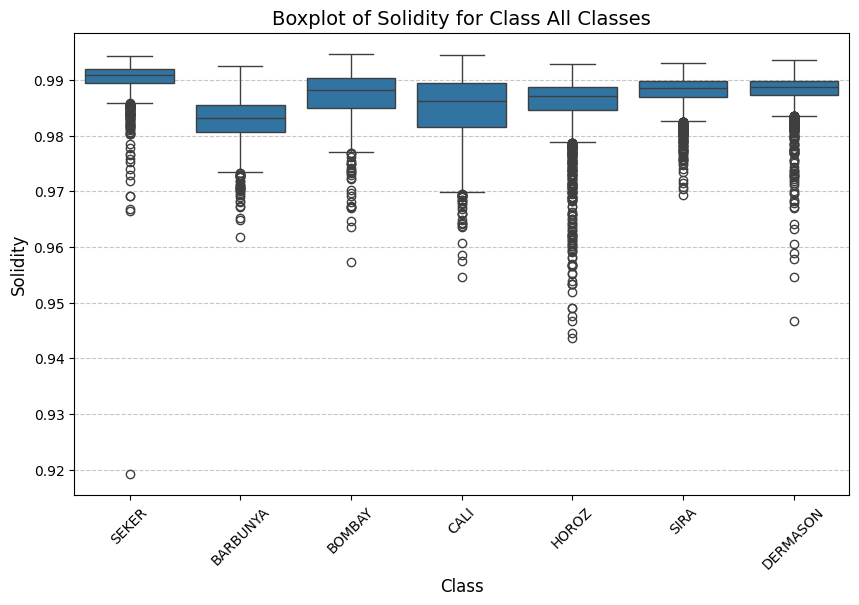

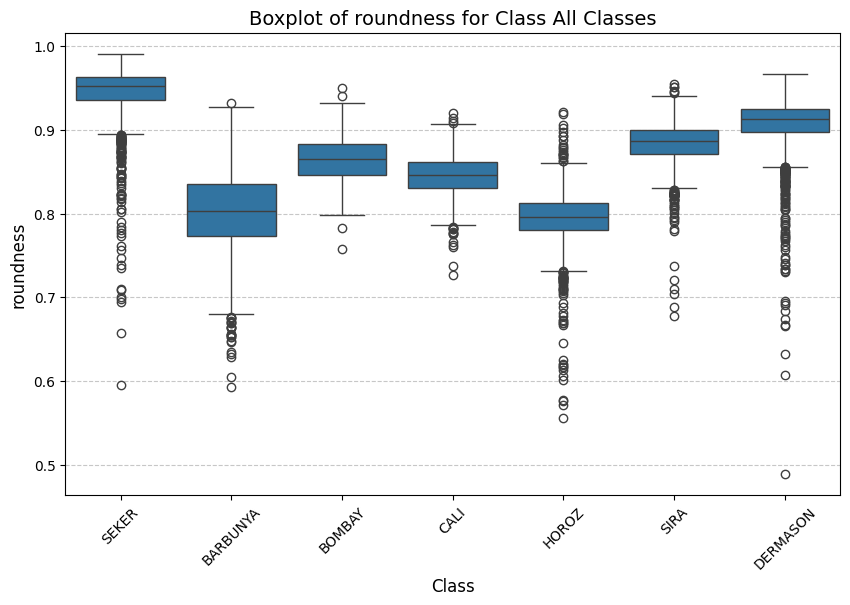

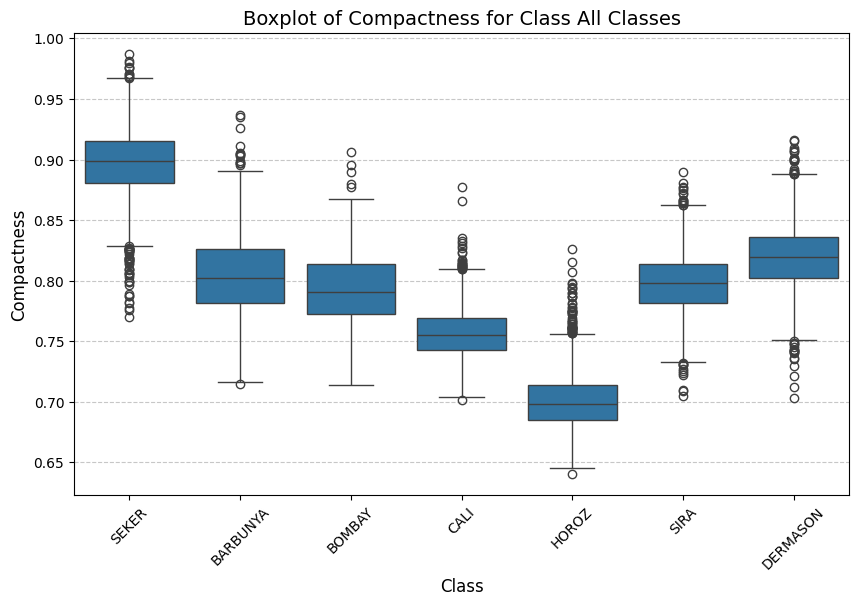

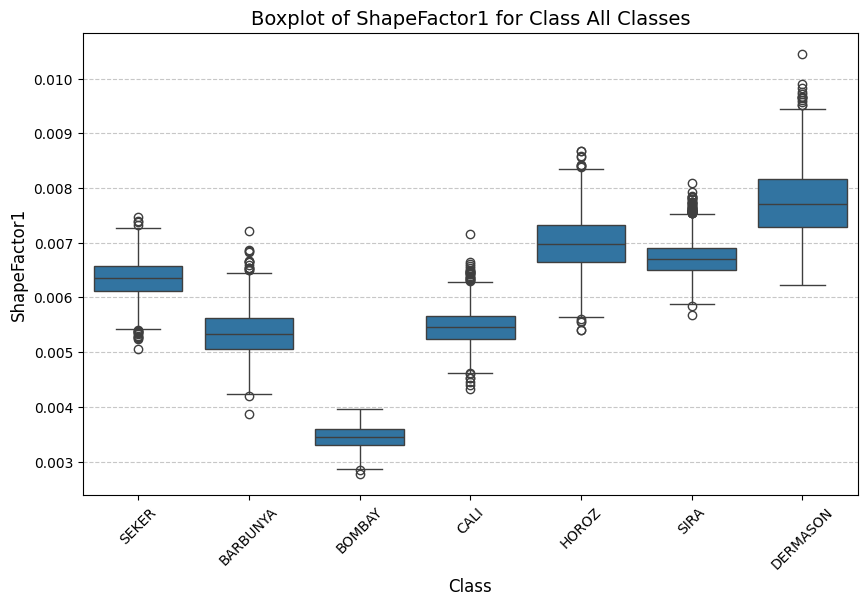

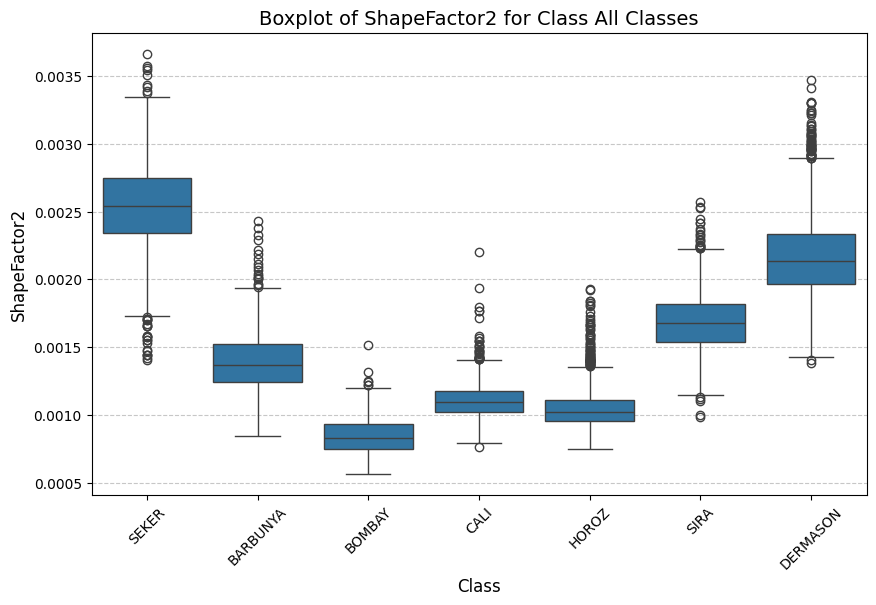

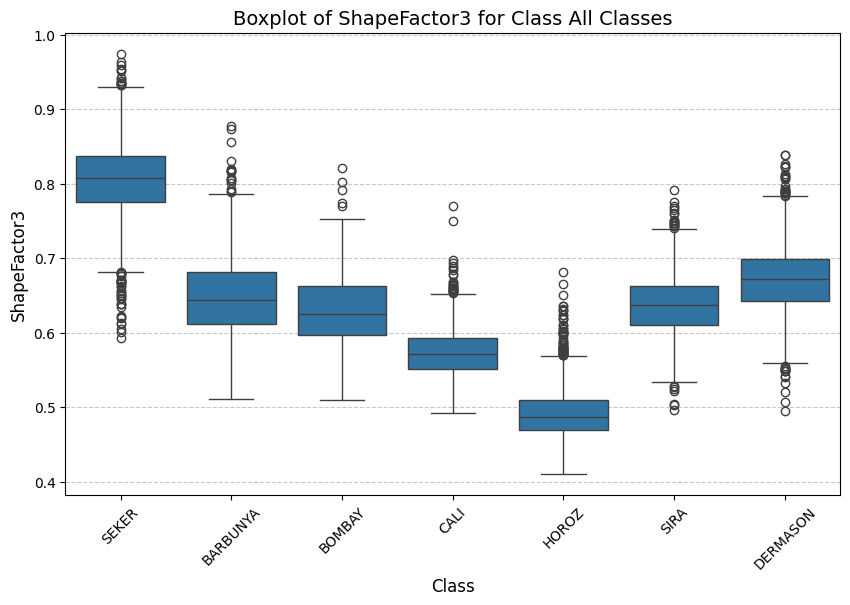

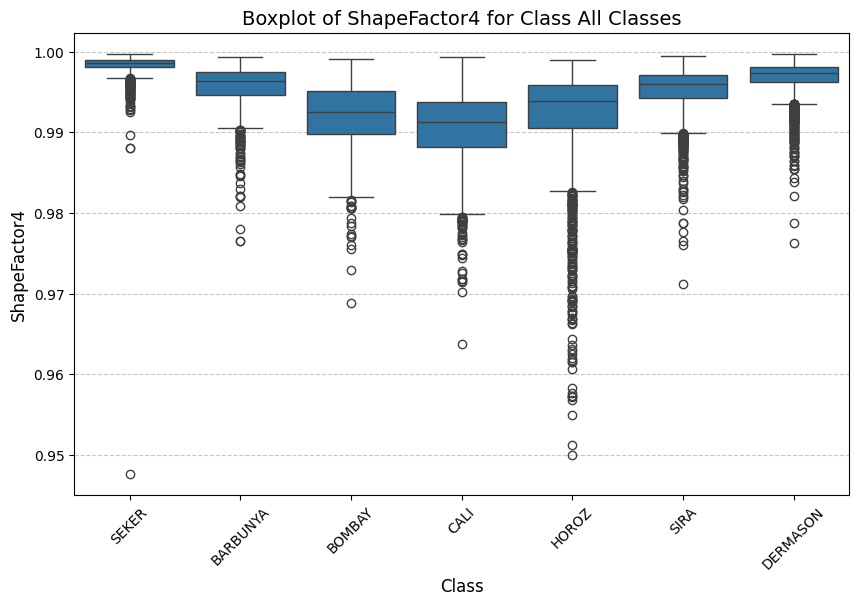

In [ ]:
for feature in feature_array:
    plot_boxplot(data, feature, "All Classes")

## Klasik PreProcess İşlemleri

### Delete Duplicate

In [ ]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.shape

(13543, 17)

In [ ]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### Label Encoder

İki farklı encoding yöntemi de denenmiştir.

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# Label Encoding işlemi
label_encoder = LabelEncoder()
data_encoded_label = data.copy()
data_encoded_label['Class_Encoded'] = label_encoder.fit_transform(data['Class'])

data_encoded_label.drop("Class", axis=1, inplace = True)
print(data_encoded_label.shape)
data_encoded_label

(13543, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_Encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


### One Hot Encoder

In [ ]:
# OneHotEncoder işlemi
encoder = OneHotEncoder(sparse_output=False)
encoded_classes = encoder.fit_transform(data[['Class']])

# Yeni DataFrame'e ekleme
data_encoded_ohe = pd.DataFrame(encoded_classes, columns=encoder.get_feature_names_out(['Class']))
data_encoded_ohe = pd.concat([data, data_encoded_ohe], axis=1)
data_encoded_ohe.drop("Class", axis=1, inplace = True)
print(data_encoded_ohe.shape)
data_encoded_ohe

(13543, 23)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.003564,0.909851,0.998430,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,...,0.001852,0.668237,0.995222,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Herhangi bir data leakage gibi problemlerle karşılaşmamak için one_hot_encoder tercih edilmiştir get_dummys yerine.

Görüldüğü üzere boxplotlarda aykırı değerler vardır. Aykırı değerler varsa incelenecek ve sezgisel olarak yapılacak işleme karar verilecektir. Bazen aykırı değerler o özelliğin çok doğal bir parçası olduğu için olduğu gibi bırakmayı tercih edebilmekteyim. Çünkü genelleştirilmiş bir model oluştururken aykırı değerlerin tümüyle dışlanması, modelin gerçek dünyadaki performansını olumsuz etkileyebilir.

İşlemlerimize encoded label ile devam edeceğiz. Tree modeli uzaklıklara bakmadığı için

In [ ]:
data_encoded_label

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_Encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [ ]:
X = data_encoded_label.drop("Class_Encoded", axis=1)
y = data_encoded_label["Class_Encoded"]
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
y.head()

,Class_Encoded
0,5
1,5
2,5
3,5
4,5


## Veriyi Eğitime Hazırlama

Test verisinin amacı, **modelin gerçek dünyadaki performansını** değerlendirmektir. Gerçek dünyada veri genellikle dengesiz olabileceği için, test setini olduğu gibi bırakmak, modelin dengesiz veri üzerinde nasıl performans gösterdiğini anlamanızı sağlar.

Bu veri seti ile yapılan diğer çalışmaları incelediğimde veri setinin tamamına **Smooth**, **PCA**, **outlier removal** işlemleri uygulandığını gördüm.

* Örneğin, burada elde edilen başarıda test verisini manipüle etmenin etkisi büyüktür. Yapılan işlemler projede denendi lakin test verisini manipüle etmeden aynı başarı elde edilemedi.
[Automated Classification of Dry Bean Varieties Using XGBoost
and SVM Models](https://arxiv.org/abs/2408.01244)



Benzer bir durum diğer birçok makalede de gözlenmiştir, aslında modelin ayırt edebilme özelliğinde bir artış olmadığı halde Accuracy değeri; Smote, ADASYN algoritmaları test datası üzerinde de kullanılarak sanki model başarılı olmuş gibi gösterilmiştir.

Smote kullanımı özellikle pairplotlar incelendiğinde bizim problemimize uygun bir yöntem zaten değil! SMOTE, sentetik veri noktaları oluşturarak veri setini dengeler, bu da kabaca oversampling yöntemine eşdeğerdir. Örneğin, A ve B noktalarını alıp (A+B)/2 oluşturduğunuzda, bu işlem A ve B'yi 1.5 ağırlıklandırmaya kabaca eşdeğer olur. Ancak, veri noktalarının bu şekilde oluşturulması, her zaman tutarlı bir performans artışı sağlamadığı görünmektedir. Bunun tartışıldığı bir [konu başlığı](https://datascience.stackexchange.com/questions/106461/why-smote-is-not-used-in-prize-winning-kaggle-solutions)


ADASYN çalışma mantığı gereği daha yakın geldi çünkü daha zor öğrenilen (çoğunluk sınıfına yakın) azınlık sınıf noktalarına ağırlık vererek bu bölgelerde daha fazla sentetik veri üretir. Lakin [Comparison of multiclass classification techniques using dry bean dataset](https://www.sciencedirect.com/science/article/pii/S2666307423000013) incelendiğinde

![Dry Bean Confusion Matrix Visualization](https://github.com/AysenurYrr/ML-Lab/raw/main/DryBeanDataset/images/img-1.PNG)

Tabloya baktığımızda ilk tabloda ADASYN kullanılmadan önce Dermason ve Sira türüne ait fasulyeler karıştırılmaktaydı. Bombay türüne ait fasulye dengesiz bir durumda olmasına rağmen karıştırılması ile ilgili bir problem yaşanmıyordu %100 bir şekilde doğru tahmin ediliyor. Bunun sebebi önceden de söylemiş olduğumuz gibi Bombay fasulyesi featurelar bakımından diğerleriyle rahatlıkla ayırt edilebilir bir durumda, dolayısı ile zaten karıştırılmasını pek beklemiyoruz. Karıştırılması durumundan oversampling yapmak mantıklı olabilirdi ya da weighted kullanılarak eğitim yapmak daha mantıklı bir yaklaşım olabilirdi. İkinci tabloda Adasyn kulanılarak eğitim yapıldığında Sira ve Dermason hala karıştırılmaya devam ediyor ve diğer fasulye türlerinde de karıştırılmalar mevcut. Ama Bombay fasulye türü 116 dan 710'a çıktığı için Accuracy artmış ve bir ilüzyon oluşturulmuştur.

Aynı zamanda en büyük hatalardan biri de test datasının da oversampling yapılarak sanki güzel bir sonuç elde etmiş gibi gösterilmesidir. Bu durumları biz de Ödev kapsamında test edeceğiz.

![Dry Bean Performance Measures Visualization](https://github.com/AysenurYrr/ML-Lab/raw/main/DryBeanDataset/images/img-2.PNG)

### Train Test Split

Evaluation bölümü için X_test ve y_test dataları manipüle edilmeden testlerimizi gerçek dünyaya uygun yapacağız. Hiperparametrelerimizi X_train ve y_train üzerinde validation skorlarımızı ve hiperparametrelerimiz Kfold kullanarak yapacağız.


In [ ]:
# Veriyi test ve eğitim olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Scale

In [ ]:
# Eğitim setini ölçekleme
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScale edilmemiş")
print(X_train.shape)
print(y_train.shape)
print("\nScale edilmiş")
print(X_train_scaled.shape)
print(y_train.shape)

print("\n*****************")
print("Test Datası, Gerçek dünyaya uygun olması açısından balance gibi şeyler yapılmayacaktır. Sadece Scale işlemi uygulanır")
print(X_test_scaled.shape)
print(y_test.shape)



Scale edilmemiş
(10834, 16)
(10834,)

Scale edilmiş
(10834, 16)
(10834,)

*****************
Test Datası, Gerçek dünyaya uygun olması açısından balance gibi şeyler yapılmayacaktır. Sadece Scale işlemi uygulanır
(2709, 16)
(2709,)


### PCA

Model hakkında daha çok bilgi edinmek ve modeldeki varolan **multicolinearity** problemini azaltmak için PCA kullanacağız. Tanımlayıcı İstatistikler bölümününde verilerin pairplotlarında birbirleri ile feature'larımızın yüksek korelasyonlara sahip olduğunu gördük.

In [ ]:
def visualize_pca_explained_variance(pca_model):
    """
    PCA açıklanabilirlik oranlarını görselleştirir ve oranları yazdırır.

    Parameters:
        pca_model (PCA): PCA model nesnesi.

    Returns:
        None
    """
    explained_variance = pca_model.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Açıklanabilirlik oranlarını yazdırma
    for i, (ind_var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), start=1):
        print(f"Principal Component {i}: Individual Explained Variance = {ind_var:.4f}, Cumulative Explained Variance = {cum_var:.4f}")

    # Görselleştirme
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color="blue", label="Individual Explained Variance")
    plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where="mid", label="Cumulative Explained Variance", color="orange")
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained Variance by Principal Components")
    plt.legend()
    plt.tight_layout()
    plt.show()


PCA modelini eğitirken (fit), yalnızca train veri setini kullanarak bileşenleri belirleriz. Daha sonra aynı model ile test setine sadece transform işlemi uygularız. Bu, test setinin data leakage önler ve train-test arasında tutarlılığı sağlar. Böylece her iki veri seti aynı PCA bileşenleri ile temsil edilmiş olur.

In [ ]:
pca_model = PCA(n_components=10)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

Principal Component 1: Individual Explained Variance = 0.6034, Cumulative Explained Variance = 0.6034
Principal Component 2: Individual Explained Variance = 0.2810, Cumulative Explained Variance = 0.8844
Principal Component 3: Individual Explained Variance = 0.0597, Cumulative Explained Variance = 0.9441
Principal Component 4: Individual Explained Variance = 0.0235, Cumulative Explained Variance = 0.9676
Principal Component 5: Individual Explained Variance = 0.0144, Cumulative Explained Variance = 0.9820
Principal Component 6: Individual Explained Variance = 0.0096, Cumulative Explained Variance = 0.9916
Principal Component 7: Individual Explained Variance = 0.0061, Cumulative Explained Variance = 0.9977
Principal Component 8: Individual Explained Variance = 0.0015, Cumulative Explained Variance = 0.9992
Principal Component 9: Individual Explained Variance = 0.0006, Cumulative Explained Variance = 0.9998
Principal Component 10: Individual Explained Variance = 0.0001, Cumulative Explain

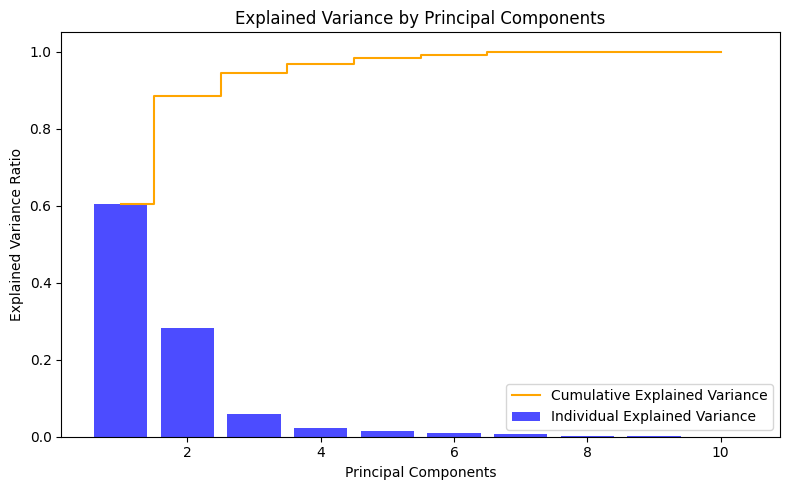

In [ ]:
# PCA açıklanabilirlik oranlarını görselleştirme
visualize_pca_explained_variance(pca_model)

Burada PC1 ve PC2 yi özniteliklerini kullanmak verimizin %88 olarak açıklanabilirliğini yansıtmaktadır. Yüksek boyuttaki verilerde bunları kullanarak bile yapılacak çalışmalar kullanılabilir. Lakin benim problemimde datasetimin büyüklüğü sorun teşkil etmediği için **multicolinearity** den kurtulmak istediğim için %99.77 açıklanabilirlik ile ilk 7 Principal Component'i kullanacağım.



In [ ]:
# İlk 5 feature'ı seçme
X_train_reduced = X_train_pca[:, :7]
X_test_reduced = X_test_pca[:, :7]
print("X_train_reduced Shape",X_train_reduced.shape)
print("X_test_reduced Shape",X_test_reduced.shape)

X_train_reduced Shape (10834, 7)
X_test_reduced Shape (2709, 7)


## Fonksiyonlar

### Validation Function

Veri setimde data leakage'i önlemek ve herhangi bir sınıfın tek bir **veri setine toplanmasını engellemek** için **stratified=y** kullanıyorum. Bu, her sınıfın oranını hem train hem de validation veri setinde koruyarak dengeli bir dağılım sağlıyor. Böylece model, tüm sınıfları adil bir şekilde öğrenme şansı elde ediyor.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def KFold_validation(X, y, model=None, cv=2):
    """
    Label encoded veri ile k-fold çapraz doğrulama uygulayarak bir modeli değerlendirir ve
    confusion matrix bilgilerini görselleştirir.

    Parameters:
        X (pd.DataFrame or np.ndarray): Özellikler (features).
        y (pd.Series or np.ndarray): Sınıf etiketleri (labels, label encoded formatında).
        model: Kullanılacak makine öğrenimi modeli (varsayılan RandomForestClassifier).
        cv (int): Çapraz doğrulama kat sayısı (folds).

    Returns:
        dict: CV doğruluk skorları, ortalama skor, standart sapma ve confusion matrices.
    """
     # Veriyi NumPy dizisine dönüştürme (Pandas uyumsuzluğu önlemek için)
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    f1_scores = []
    confusion_matrices = []

    for train_index, validation_index in skf.split(X, y):
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]


        # Model eğitimi ve tahmin
        model.fit(X_train, y_train)
        y_pred = model.predict(X_validation)

        # Skor kaydı
        scores.append(model.score(X_validation, y_validation))

        # F1 score kaydı
        f1 = f1_score(y_validation, y_pred, average="weighted")
        f1_scores.append(f1)

        # Confusion matrix
        cm = confusion_matrix(y_validation, y_pred, labels=np.unique(y))
        confusion_matrices.append(cm)

    # Ortalama confusion matrix
    mean_cm = np.mean(confusion_matrices, axis=0).astype(int)
    mean_f1 = np.mean(f1_scores)

    # Görselleştirme
    disp = ConfusionMatrixDisplay(confusion_matrix=mean_cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title("Average Confusion Matrix Across Folds")
    plt.show()

    # Sonuçları döndürme
    results = {
        #"CV Scores": scores,
        "Mean Accuracy": np.mean(scores),
        #"Mean Standard Deviation": np.std(scores),
        #"F1 Scores": f1_scores,
        "Mean F1 Score": np.mean(f1_scores)
        #"Confusion Matrices": confusion_matrices
    }
    return results, mean_f1


### Evaluation Function

Bu fonksiyon, bir makine öğrenimi modelinin test verisi üzerindeki performansını değerlendirmek için tasarlanmıştır ve sonuçları metriklerle birlikte görsel olarak sunar. Modelin gerçek dünya, genel performansını test etmek ve genelleme yeteneğini ölçmeyi amaçlar

In [ ]:
def evaluation_func(X_test, y_test, model):
    """
    Test verisi üzerinde bir modelin performansını değerlendirir ve görselleştirir.

    Parameters:
        X_test (pd.DataFrame or np.ndarray): Test özellikleri (features).
        y_test (pd.Series or np.ndarray): Test sınıf etiketleri (labels).
        model: Eğitimli makine öğrenimi modeli.

    Returns:
        dict: Classification report, confusion matrix.
    """
    # Veriyi NumPy dizisine dönüştürme (Pandas uyumsuzluğu önlemek için)
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values
    if isinstance(y_test, pd.Series):
        y_test = y_test.values

    # Test verisi üzerinde tahmin yap
    y_pred = model.predict(X_test)

    # Classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    f1_score_ = f1_score(y_test, y_pred, average="weighted")

    # Görselleştirme
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title("Confusion Matrix on Test Set")
    plt.show()

    # Sonuçları döndürme
    results = {
        #"Confusion Matrix": cm,
        "f1 score": f1_score_,
        "Classification Report": class_report
    }
    return results, f1_score_

## Model Random Forest

### Model-1: Base Model (Scale yok)

Base model olarak basit bir random forest classfier kullanarak, ölçeklendirilmemiş ve dengelenmemiş veri setimiz üzerinde modelin başarısını inceleyeceğiz.

Base modelimiz, dengelenmemiş veri seti üzerine **scale edilmemiş** datamıza uygulanacaktır. KFold Validation Fonksiyonu kullanarak *train datası üzerinde ezberleme yapmadan validation yapılması amaçlanmıştır*. Daha sonra test verisi üzerinde Evaluation Function çağrılarak fit edilmiş modelin daha önce hiç görmediği bir data üzerinde **genelleme performansı** incelenecektir.



Burada dikkatinizi çekmek istediğim bir şey var. Ağaç bazlı modellerde ölçeklendirmenin bir önemi yoktur çünkü ağaç bazlı modellerde **Gini katsayısı** veya **entropi** gibi kriterlere göre dallanma koşulları belirlenir. Bu kriterlerde, en iyi bölünme noktası aranır ve bölünme işlemi hem normalize edilmiş hem de ölçeklenmemiş özellikler üzerinde aynı sonuçları verir. *Model-1* ve *Model-2* de bunu size göstermiş olacağız.

Örnek vermek gerekirse: Yaş bilgisi içeren bir sütununuz olduğunu düşünelim. Bölünme şu şekilde yapılabilir:

* Normalizasyon yapılmadan: yaş > 18
* Normalizasyon yapıldıktan sonra: normalize_yaş > 0.4

Burada verilen değerler örnektir, ancak dikkat edilmesi gereken nokta, normalizasyon yapılmış ya da yapılmamış olması fark etmeksizin, bölünme sonuçlarının aynı olacağıdır. Çünkü ağaçlar, yalnızca özelliğin sırasına ve sınıf dağılımına bakar, mutlak değerlerle ilgilenmez.

Bu nedenle, ağaç tabanlı modellerde ölçeklendirme işlemleri genellikle gereksizdir, pipeline'ı sağlamak ve diğer modellerle karşılaştırmak için bu işlemi yine de yaparız. Ancak ben bunu karşılaştırmak amaçlı Model-1 ve Model-2 yi koydum.

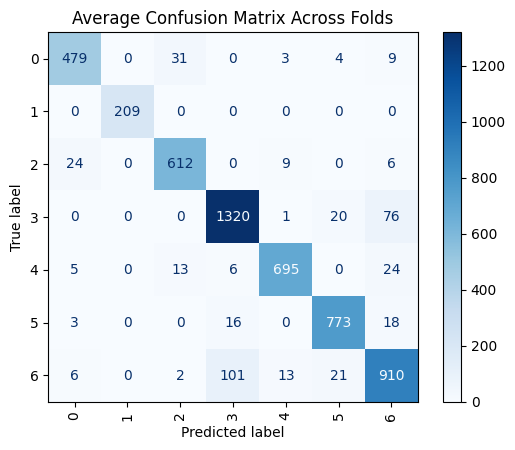

{'Mean Accuracy': 0.9229278198264722, 'Mean F1 Score': 0.9228829802184471}


In [ ]:
# Fonksiyonunu ksiyonu çağır ve sonuçları al
base_model = RandomForestClassifier(random_state=42)
results, rf_base_train_f1 = KFold_validation(X_train, y_train, base_model, cv=2)
print(results)

İncelendğinde sonuçlar gerçekte 6 olarak etiketlenmiş örneklere modelimiz 135 diyor en çok burada hata mevcut. Şimdi base modelimizi test verisi ile de deneyeceğiz.

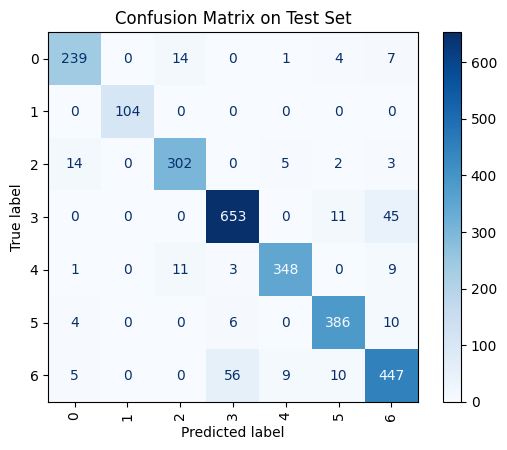

Classification Report:
0: {'precision': 0.908745247148289, 'recall': 0.9018867924528302, 'f1-score': 0.9053030303030303, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9235474006116208, 'recall': 0.9263803680981595, 'f1-score': 0.9249617151607963, 'support': 326.0}
3: {'precision': 0.9094707520891365, 'recall': 0.921015514809591, 'f1-score': 0.9152067274001402, 'support': 709.0}
4: {'precision': 0.9586776859504132, 'recall': 0.9354838709677419, 'f1-score': 0.9469387755102041, 'support': 372.0}
5: {'precision': 0.9346246973365617, 'recall': 0.9507389162561576, 'f1-score': 0.9426129426129426, 'support': 406.0}
6: {'precision': 0.8579654510556622, 'recall': 0.8481973434535104, 'f1-score': 0.8530534351145038, 'support': 527.0}
accuracy: 0.9150978220745662
macro avg: {'precision': 0.9275758905988118, 'recall': 0.9262432580054273, 'f1-score': 0.9268680894430882, 'support': 2709.0}
weighted avg: {'precision': 0.9150764951359964, 'r

In [ ]:
test_results, rf_base_test_f1 = evaluation_func(X_test, y_test, base_model)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

Burada modelin her sınıf için performansını görmekteyiz. Örneğin modelimiz sınıfı 1 olanları %100 doğrulukla başarılı bir şekilde tahmin edebilmiştir.

### Model-2: Scale Var

In [ ]:
print("Scale edilmiş, Balance edilmemiş")
print(X_train_scaled.shape)
print(y_train.shape)

Scale edilmiş, Balance edilmemiş
(10834, 16)
(10834,)


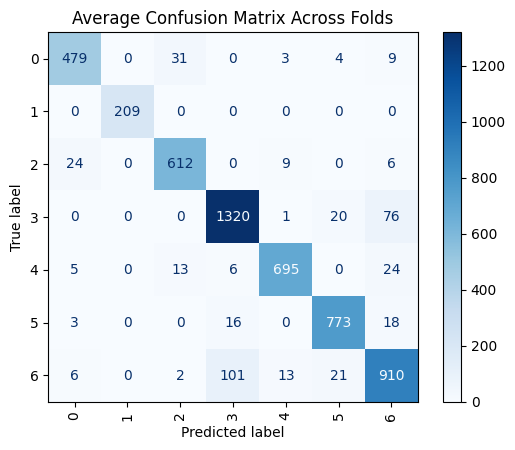

{'Mean Accuracy': 0.9229278198264722, 'Mean F1 Score': 0.9228829802184471}

In [ ]:
# Fonksiyonunu ksiyonu çağır ve sonuçları al
model_2 = RandomForestClassifier(random_state=42)
results, rf_scale_train_f1 = KFold_validation(X_train_scaled, y_train, model_2, cv=2)
results

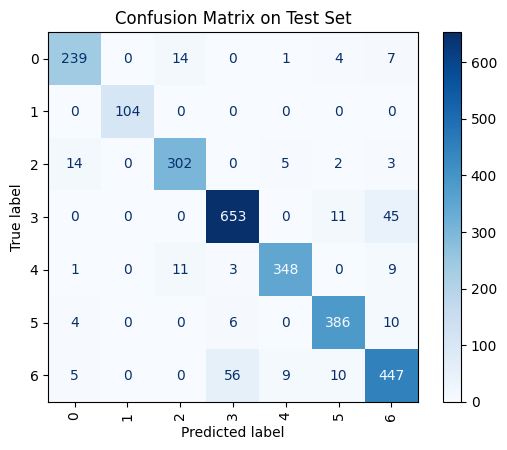

Classification Report:
0: {'precision': 0.908745247148289, 'recall': 0.9018867924528302, 'f1-score': 0.9053030303030303, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9235474006116208, 'recall': 0.9263803680981595, 'f1-score': 0.9249617151607963, 'support': 326.0}
3: {'precision': 0.9094707520891365, 'recall': 0.921015514809591, 'f1-score': 0.9152067274001402, 'support': 709.0}
4: {'precision': 0.9586776859504132, 'recall': 0.9354838709677419, 'f1-score': 0.9469387755102041, 'support': 372.0}
5: {'precision': 0.9346246973365617, 'recall': 0.9507389162561576, 'f1-score': 0.9426129426129426, 'support': 406.0}
6: {'precision': 0.8579654510556622, 'recall': 0.8481973434535104, 'f1-score': 0.8530534351145038, 'support': 527.0}
accuracy: 0.9150978220745662
macro avg: {'precision': 0.9275758905988118, 'recall': 0.9262432580054273, 'f1-score': 0.9268680894430882, 'support': 2709.0}
weighted avg: {'precision': 0.9150764951359964, 'r

In [ ]:
test_results, rf_scale_test_f1 = evaluation_func(X_test_scaled, y_test, model_2)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

### Model-3: PCA

In [ ]:
# İlk 5 feature'ı seçme
X_train_reduced = X_train_pca[:, :5]
X_test_reduced = X_test_pca[:, :5]
print("X_train_reduced Shape",X_train_reduced.shape)
print("X_test_reduced Shape",X_test_reduced.shape)

X_train_reduced Shape (10834, 5)
X_test_reduced Shape (2709, 5)


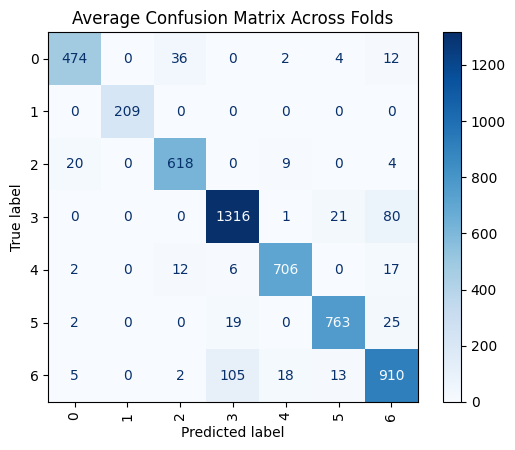

{'Mean Accuracy': 0.9222817057411852, 'Mean F1 Score': 0.9222456681081616}

In [ ]:
model_3 = RandomForestClassifier(random_state=42)
results, rf_pca_train_f1 = KFold_validation(X_train_reduced, y_train, model_3, cv=2)
results

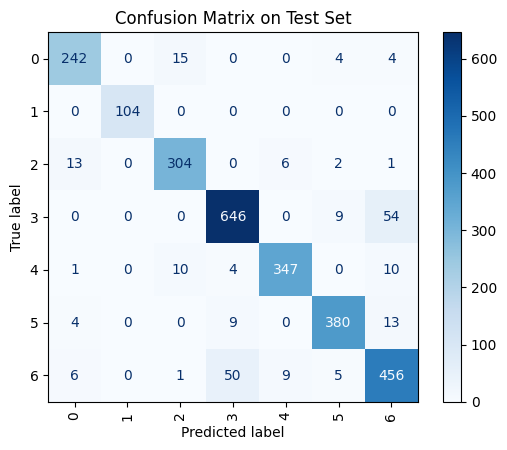

Classification Report:
0: {'precision': 0.9097744360902256, 'recall': 0.9132075471698113, 'f1-score': 0.911487758945386, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9212121212121213, 'recall': 0.9325153374233128, 'f1-score': 0.926829268292683, 'support': 326.0}
3: {'precision': 0.9111424541607899, 'recall': 0.9111424541607899, 'f1-score': 0.9111424541607899, 'support': 709.0}
4: {'precision': 0.9585635359116023, 'recall': 0.9327956989247311, 'f1-score': 0.9455040871934605, 'support': 372.0}
5: {'precision': 0.95, 'recall': 0.9359605911330049, 'f1-score': 0.9429280397022333, 'support': 406.0}
6: {'precision': 0.8475836431226765, 'recall': 0.8652751423149905, 'f1-score': 0.856338028169014, 'support': 527.0}
accuracy: 0.9150978220745662
macro avg: {'precision': 0.9283251700710593, 'recall': 0.9272709673038059, 'f1-score': 0.9277470909233666, 'support': 2709.0}
weighted avg: {'precision': 0.9156026549884931, 'recall': 0.91509

In [ ]:
test_results, rf_pca_test_f1 = evaluation_func(X_test_reduced, y_test, model_3)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

### Model-4: Balance Weights + PCA

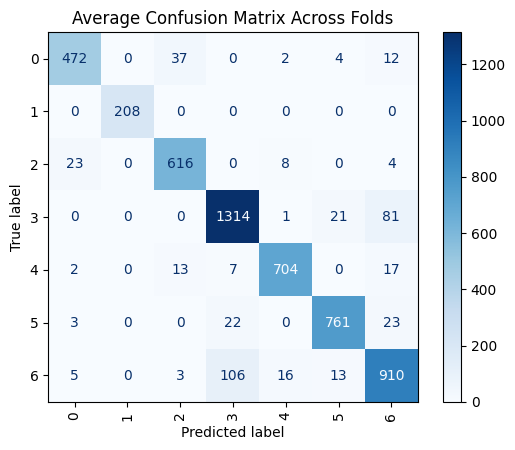

{'Mean Accuracy': 0.9205279675096918, 'Mean F1 Score': 0.9205221927821419}

In [ ]:
model_4 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
results, rf_pca_bal_train_f1 = KFold_validation(X_train_reduced, y_train, model_4, cv=2)
results

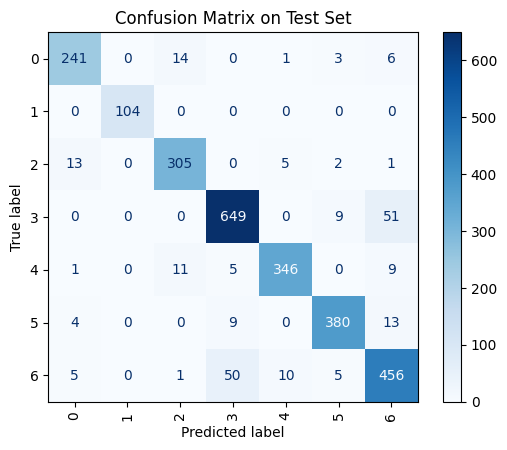

Classification Report:
0: {'precision': 0.9128787878787878, 'recall': 0.909433962264151, 'f1-score': 0.9111531190926276, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9214501510574018, 'recall': 0.9355828220858896, 'f1-score': 0.928462709284627, 'support': 326.0}
3: {'precision': 0.9102384291725105, 'recall': 0.9153737658674189, 'f1-score': 0.9127988748241913, 'support': 709.0}
4: {'precision': 0.9558011049723757, 'recall': 0.9301075268817204, 'f1-score': 0.9427792915531336, 'support': 372.0}
5: {'precision': 0.9523809523809523, 'recall': 0.9359605911330049, 'f1-score': 0.9440993788819876, 'support': 406.0}
6: {'precision': 0.8507462686567164, 'recall': 0.8652751423149905, 'f1-score': 0.8579492003762935, 'support': 527.0}
accuracy: 0.9158361018826136
macro avg: {'precision': 0.929070813445535, 'recall': 0.9273905443638822, 'f1-score': 0.9281775105732659, 'support': 2709.0}
weighted avg: {'precision': 0.9162911168750024, 're

In [ ]:
test_results, rf_pca_bal_test_f1 = evaluation_func(X_test_reduced, y_test, model_4)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

### Model-5: RF Balanced

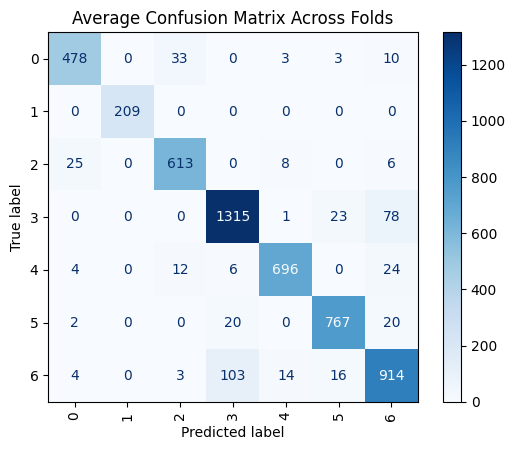

{'Mean Accuracy': 0.9218201956802659, 'Mean F1 Score': 0.9218458552965219}

In [ ]:
model_5 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
results, rf_bal_train_f1 = KFold_validation(X_train, y_train, model_5, cv=2)
results

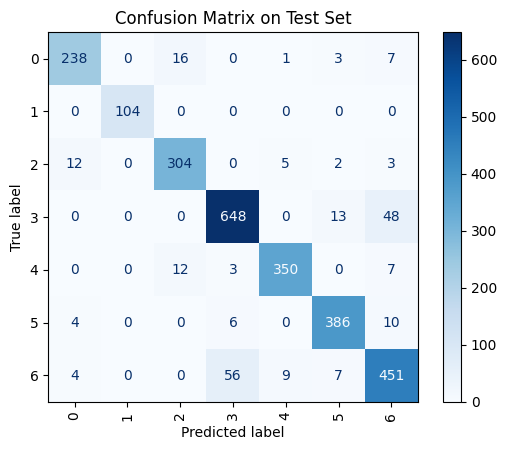

Classification Report:
0: {'precision': 0.9224806201550387, 'recall': 0.8981132075471698, 'f1-score': 0.9101338432122371, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9156626506024096, 'recall': 0.9325153374233128, 'f1-score': 0.9240121580547113, 'support': 326.0}
3: {'precision': 0.908835904628331, 'recall': 0.9139633286318759, 'f1-score': 0.9113924050632911, 'support': 709.0}
4: {'precision': 0.958904109589041, 'recall': 0.9408602150537635, 'f1-score': 0.9497964721845319, 'support': 372.0}
5: {'precision': 0.9391727493917275, 'recall': 0.9507389162561576, 'f1-score': 0.944920440636475, 'support': 406.0}
6: {'precision': 0.8574144486692015, 'recall': 0.855787476280835, 'f1-score': 0.8566001899335233, 'support': 527.0}
accuracy: 0.9158361018826136
macro avg: {'precision': 0.9289243547193928, 'recall': 0.927425497313302, 'f1-score': 0.9281222155835385, 'support': 2709.0}
weighted avg: {'precision': 0.9159106401948288, 'reca

In [ ]:
test_results, rf_bal_test_f1 = evaluation_func(X_test, y_test, model_5)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

In [ ]:
# Verileri bir tabloya yerleştirme
df_scores = {
    'Model': ['RF + PCA', 'RF + PCA', 'RF + Scale', 'RF + Scale', 'RF Base', 'RF Base','PCA Balanced','PCA Balanced',"Balanced","Balanced"],
    'Dataset': ['Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train',"Test", "Train"],
    'F1 Score': [
        rf_pca_test_f1, rf_pca_train_f1,
        rf_scale_test_f1, rf_scale_train_f1,
        rf_base_test_f1, rf_base_train_f1,
        rf_pca_bal_test_f1, rf_pca_bal_train_f1,
        rf_bal_test_f1, rf_bal_train_f1
    ]
}

df_scores = pd.DataFrame(df_scores)
df_scores = df_scores.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
df_scores

,Model,Dataset,F1 Score
0,RF + Scale,Train,0.922883
1,RF Base,Train,0.922883
2,RF + PCA,Train,0.922246
3,Balanced,Train,0.921846
4,PCA Balanced,Train,0.920522
5,PCA Balanced,Test,0.916008
6,Balanced,Test,0.915829
7,RF + PCA,Test,0.915296
8,RF + Scale,Test,0.915041
9,RF Base,Test,0.915041


Modellerde görüldüğü gibi PCA Balanced en yüksek başarıyı gösteriyor bunun olmasının muhtemel sebebi PCA Balanced ile daha genel bir model oluşturulduğu için Test verisini genelleme başarısı da biraz oslun daha yüksek oluyor.

### Hiperparametre Optimizasyonu

In [ ]:

# Hiperparametreler için grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Ağaç sayısı
    'max_depth': [10, 20, 30],         # Maksimum derinlik
    'min_samples_split': [ 5, 10],         # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [12, 4],           # Yaprak düğümündeki minimum örnek sayısı
    'max_features': ['sqrt', 'log2', None],  # Her bir ağaç için kullanılacak maksimum özellik sayısı
}

In [ ]:
# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=2,                    # 5 katlı çapraz doğrulama
    scoring='f1_macro',      # Makro F1 skoru ile değerlendirme
    n_jobs=-1                # Paralel işlem kullanımı
)

# Modeli eğitme
grid_search.fit(X_train_reduced, y_train)

# En iyi parametreleri görüntüleme
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# En iyi modeli seçme
best_model = grid_search.best_estimator_

# Test setinde tahmin yapma
y_test_pred = best_model.predict(X_test_reduced)

# Sonuçları değerlendirme
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score (Weighted):", f1_score(y_test, y_test_pred, average='weighted'))
print("F1 Score (Macro):", f1_score(y_test, y_test_pred, average='macro'))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.9150978220745662
F1 Score (Weighted): 0.915284421416472
F1 Score (Macro): 0.9262149595387351

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       265
           1       1.00      1.00      1.00       104
           2       0.90      0.93      0.92       326
           3       0.92      0.90      0.91       709
           4       0.96      0.93      0.94       372
           5       0.94      0.94      0.94       406
           6       0.86      0.88      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709


Confusion Matrix:
[[239   0  17   0   1   4   4]
 [  0 104   0   0   0   0   0]
 [ 15   0 303   0   5   2   1]
 [  0   0   0 639   0  13  57]
 [  1   0  15   5 345   0   6]
 [  6   0   0   7   0 383  10]
 [  4   0   1  41   8   7 466]]


### Model-6: RF ADASYN

Buradaki bölüm [Comparison of multiclass classification techniques using dry bean dataset](https://www.sciencedirect.com/science/article/pii/S2666307423000013) makalesinde yapılan işlemlerin aslında sağlıklı olmadığını göstermek amacıyla yapılmıştır. Öncelikle ADASYN ile oversampling yapıyoruz.

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN uygulama
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

print("ADASYN sonrası veri dağılımı:")
from collections import Counter
print(Counter(y_adasyn))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ADASYN sonrası veri dağılımı:
Counter({0: 2881, 2: 2873, 4: 2868, 3: 2837, 1: 2837, 5: 2783, 6: 2749})


Gördüğümüz gibi ADASYN sonrasında veriler dengeli bir hale geldi. Şimdi Adasyn öncesi ve Adasyn sonrası verileri üzerine PCA dönüşüm işlemleri yapılarak karşılaştırıl Adasyn oversampling işleminin ne yaprığı görselleştirilecektir.

In [ ]:
pca_before_adasyn = PCA(n_components=6)  # 6 bileşene indiriyoruz (isteğe bağlı artırılabilir)
X_before_adasyn_train_pca = pca_before_adasyn.fit_transform(X_train_scaled)

# PCA ile açıklanan varyansı görüntüleme
explained_variance = pca_before_adasyn.explained_variance_ratio_
print("Açıklanan varyans oranları:", explained_variance)
print("Toplam açıklanan varyans:", sum(explained_variance))

Açıklanan varyans oranları: [0.60338759 0.28100183 0.05973431 0.0234872  0.01436141 0.00963002]
Toplam açıklanan varyans: 0.9916023564991816


In [ ]:
pca_adasyn = PCA(n_components=6)  # 6 bileşene indiriyoruz (isteğe bağlı artırılabilir)
X_adasyn_train_pca = pca_adasyn.fit_transform(X_adasyn)
X_adasyn_test_pca = pca_adasyn.transform(X_test_scaled)

# PCA ile açıklanan varyansı görüntüleme
explained_variance = pca_adasyn.explained_variance_ratio_
print("Açıklanan varyans oranları:", explained_variance)
print("Toplam açıklanan varyans:", sum(explained_variance))

Açıklanan varyans oranları: [0.52421219 0.3737607  0.05326267 0.02308502 0.0116837  0.00700517]
Toplam açıklanan varyans: 0.993009438317615


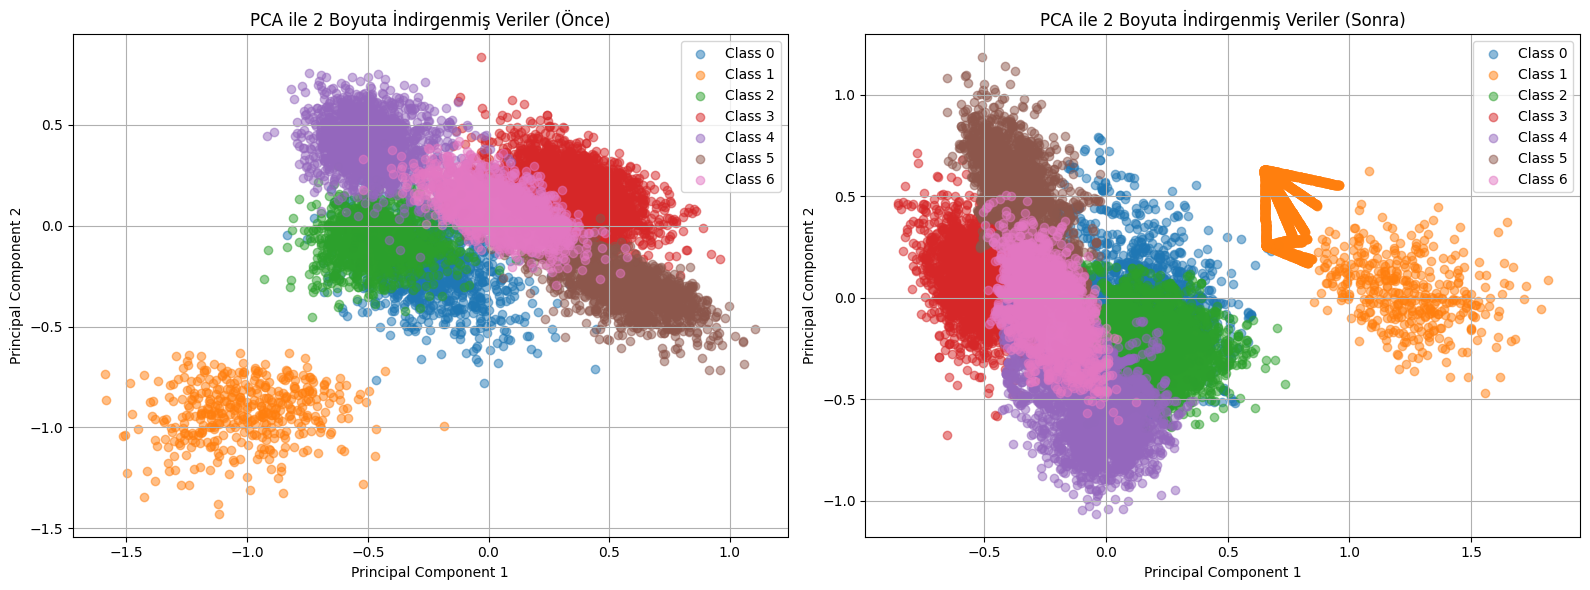

In [ ]:
# Yan yana iki grafik oluşturmak için subplots ayarı
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# İlk grafik: PCA ile 2 boyuta indirgenmiş veriler (ADASYN öncesi)
for label in np.unique(y_train):
    axs[0].scatter(
        X_before_adasyn_train_pca[y_train == label, 0],
        X_before_adasyn_train_pca[y_train == label, 1],
        label=f"Class {label}", alpha=0.5
    )
axs[0].set_title("PCA ile 2 Boyuta İndirgenmiş Veriler (Önce)")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].legend()
axs[0].grid()

# İkinci grafik: PCA ile 2 boyuta indirgenmiş veriler (ADASYN sonrası)
for label in np.unique(y_adasyn):
    axs[1].scatter(
        X_adasyn_train_pca[y_adasyn == label, 0],
        X_adasyn_train_pca[y_adasyn == label, 1],
        label=f"Class {label}", alpha=0.5
    )
axs[1].set_title("PCA ile 2 Boyuta İndirgenmiş Veriler (Sonra)")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].legend()
axs[1].grid()

# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

Oversampling sonrası PCA ile görselleştirme yapıldığında görüldüğü üzere ADASYN aslında sağda görünen turuncu noktalara eklemeler yapmıştır daha çok ve bu şekilde kendi eklediği noktalarla modelin validation bölümünde performansı yükselmiş gibi göstermektedir.

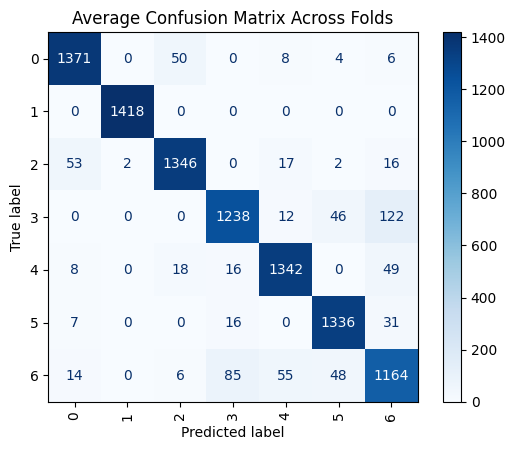

({'Mean Accuracy': 0.9297458140004036, 'Mean F1 Score': 0.9296600966034889},
 0.9296600966034889)

In [ ]:
model_6 = RandomForestClassifier(random_state=42)

# Model performansını değerlendirme
results, rf_adasyn_train_f1 = KFold_validation(X_adasyn_train_pca, y_adasyn, model=model_6, cv=2)
results, rf_adasyn_train_f1


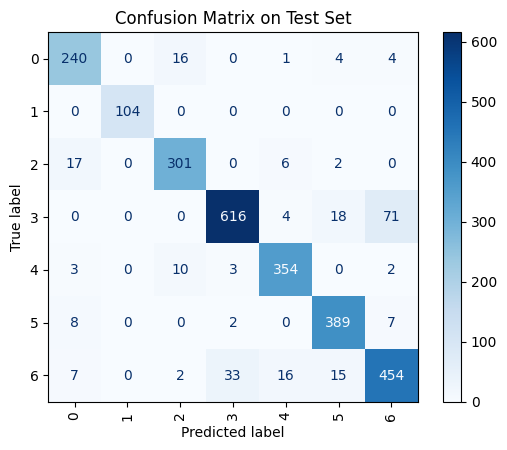

Classification Report:
0: {'precision': 0.8727272727272727, 'recall': 0.9056603773584906, 'f1-score': 0.8888888888888888, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9148936170212766, 'recall': 0.9233128834355828, 'f1-score': 0.9190839694656489, 'support': 326.0}
3: {'precision': 0.9418960244648318, 'recall': 0.8688293370944993, 'f1-score': 0.9038884812912693, 'support': 709.0}
4: {'precision': 0.9291338582677166, 'recall': 0.9516129032258065, 'f1-score': 0.9402390438247012, 'support': 372.0}
5: {'precision': 0.9088785046728972, 'recall': 0.958128078817734, 'f1-score': 0.9328537170263789, 'support': 406.0}
6: {'precision': 0.8438661710037175, 'recall': 0.8614800759013282, 'f1-score': 0.8525821596244132, 'support': 527.0}
accuracy: 0.9073458840900701
macro avg: {'precision': 0.9159136354511016, 'recall': 0.9241462365476345, 'f1-score': 0.9196480371601857, 'support': 2709.0}
weighted avg: {'precision': 0.9083397076629662, '

In [ ]:
test_results, rf_adasyn_test_f1 = evaluation_func(X_adasyn_test_pca, y_test, model_6)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

Classification Report sonucunda 3 ve 6'nın hala karıştırıldığı görülmektedir. Ve diğerlerinden daha kötü bir sonuç elde edilmektedir

## XGBoost

### Model-1: Base Model

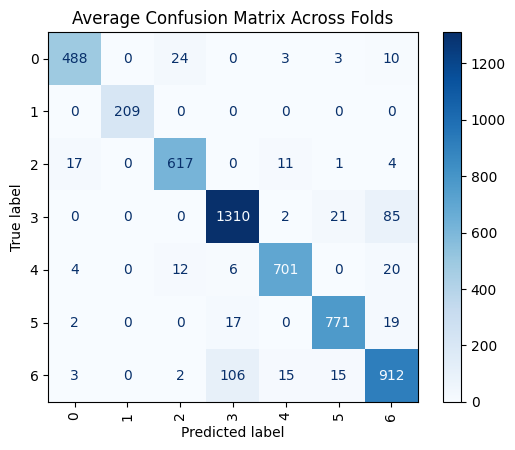

K-Fold Validation Results:
Mean Accuracy: 0.9248
Mean F1 Score: 0.9248


In [ ]:
# XGBoost modeli tanımlama
xgb_model_1 = XGBClassifier(
    objective="multi:softprob",  # Çok sınıflı problemler için
    eval_metric="mlogloss",     # Değerlendirme metriği
    random_state=42
)

# Fonksiyonu çağırma.
results, xgb_train_f1 = KFold_validation(X_train, y_train, model=xgb_model_1, cv=2)

# Sonuçları yazdırma
print("K-Fold Validation Results:")
print(f"Mean Accuracy: {results['Mean Accuracy']:.4f}")
print(f"Mean F1 Score: {xgb_train_f1:.4f}")

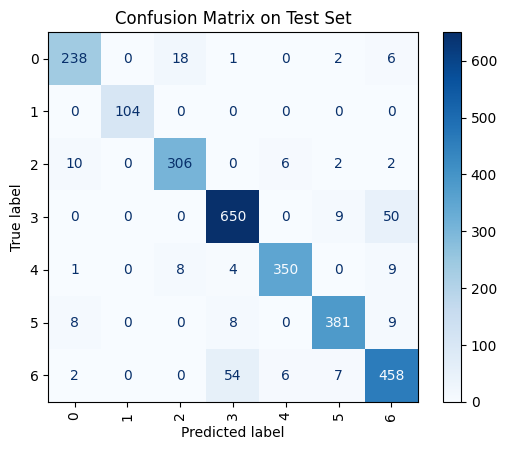

Classification Report:
0: {'precision': 0.918918918918919, 'recall': 0.8981132075471698, 'f1-score': 0.9083969465648855, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9216867469879518, 'recall': 0.9386503067484663, 'f1-score': 0.9300911854103343, 'support': 326.0}
3: {'precision': 0.9065550906555091, 'recall': 0.9167842031029619, 'f1-score': 0.9116409537166901, 'support': 709.0}
4: {'precision': 0.9668508287292817, 'recall': 0.9408602150537635, 'f1-score': 0.9536784741144414, 'support': 372.0}
5: {'precision': 0.9501246882793017, 'recall': 0.9384236453201971, 'f1-score': 0.9442379182156134, 'support': 406.0}
6: {'precision': 0.8576779026217228, 'recall': 0.8690702087286527, 'f1-score': 0.8633364750235627, 'support': 527.0}
accuracy: 0.9180509413067552
macro avg: {'precision': 0.9316877394560981, 'recall': 0.9288431123573159, 'f1-score': 0.9301974218636467, 'support': 2709.0}
weighted avg: {'precision': 0.9184741006706088, '

In [ ]:
xgb_model_1.fit(X_train,y_train)

test_results, xgb_test_f1 = evaluation_func(X_test, y_test, xgb_model_1)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

### Model-2: PCA

X_train_reduced Shape (10834, 5)
X_test_reduced Shape (2709, 5)


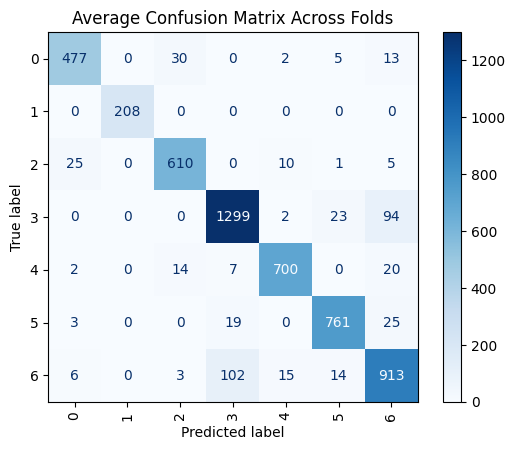

K-Fold Validation Results:
Mean Accuracy: 0.9176
Mean F1 Score: 0.9177


In [ ]:

print("X_train_reduced Shape",X_train_reduced.shape)
print("X_test_reduced Shape",X_test_reduced.shape)

# XGBoost modeli tanımlama
xgb_model_2 = XGBClassifier(
    objective="multi:softprob",  # Çok sınıflı problemler için
    eval_metric="mlogloss",     # Değerlendirme metriği
    random_state=42
)

# Fonksiyonu çağırma.
results, xgb_train_pca_f1 = KFold_validation(X_train_reduced, y_train, model=xgb_model_2, cv=2)

# Sonuçları yazdırma
print("K-Fold Validation Results:")
print(f"Mean Accuracy: {results['Mean Accuracy']:.4f}")
print(f"Mean F1 Score: {xgb_train_pca_f1:.4f}")

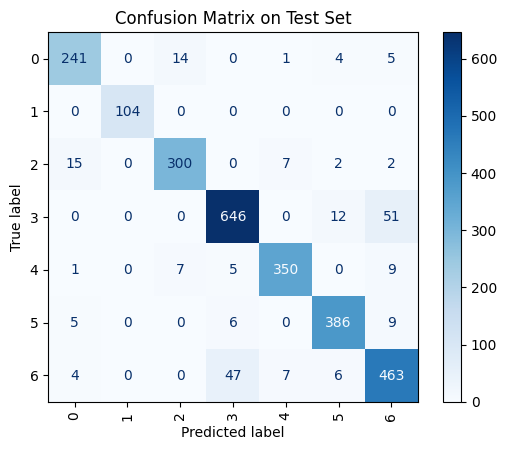

Classification Report:
0: {'precision': 0.9060150375939849, 'recall': 0.909433962264151, 'f1-score': 0.9077212806026366, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9345794392523364, 'recall': 0.9202453987730062, 'f1-score': 0.9273570324574961, 'support': 326.0}
3: {'precision': 0.9176136363636364, 'recall': 0.9111424541607899, 'f1-score': 0.9143665958952583, 'support': 709.0}
4: {'precision': 0.958904109589041, 'recall': 0.9408602150537635, 'f1-score': 0.9497964721845319, 'support': 372.0}
5: {'precision': 0.9414634146341463, 'recall': 0.9507389162561576, 'f1-score': 0.946078431372549, 'support': 406.0}
6: {'precision': 0.8589981447124304, 'recall': 0.8785578747628083, 'f1-score': 0.8686679174484052, 'support': 527.0}
accuracy: 0.9191583610188261
macro avg: {'precision': 0.9310819688779394, 'recall': 0.9301398316100967, 'f1-score': 0.9305696757086969, 'support': 2709.0}
weighted avg: {'precision': 0.9195250822120795, 're

In [ ]:
xgb_model_2.fit(X_train_reduced,y_train)

test_results, xgb_test_pca_f1 = evaluation_func(X_test_reduced, y_test, xgb_model_2)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

### Model-3: Balancing Weights + PCA

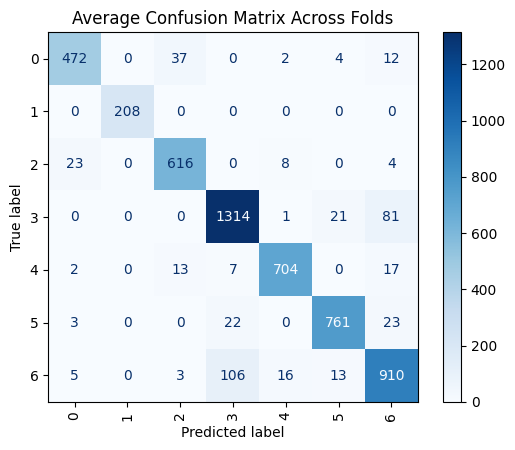

K-Fold Validation Results:
Mean Accuracy: 0.9205
Mean F1 Score: 0.9205


In [ ]:
xgb_model_3 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
results, xgb_train_bal_pca_f1 = KFold_validation(X_train_reduced, y_train, xgb_model_3, cv=2)

# Sonuçları yazdırma
print("K-Fold Validation Results:")
print(f"Mean Accuracy: {results['Mean Accuracy']:.4f}")
print(f"Mean F1 Score: {xgb_train_bal_pca_f1:.4f}")


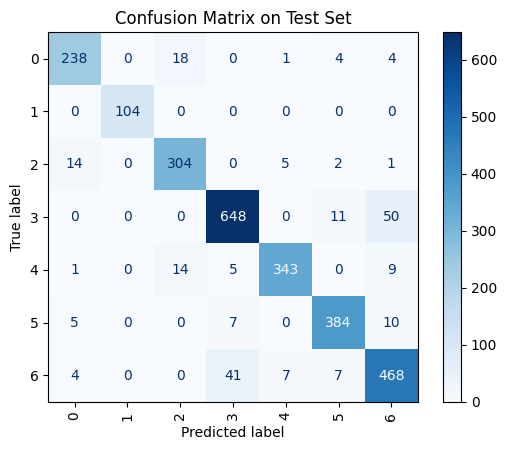

Classification Report:
0: {'precision': 0.9083969465648855, 'recall': 0.8981132075471698, 'f1-score': 0.9032258064516129, 'support': 265.0}
1: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 104.0}
2: {'precision': 0.9047619047619048, 'recall': 0.9325153374233128, 'f1-score': 0.918429003021148, 'support': 326.0}
3: {'precision': 0.9243937232524965, 'recall': 0.9139633286318759, 'f1-score': 0.9191489361702128, 'support': 709.0}
4: {'precision': 0.9634831460674157, 'recall': 0.9220430107526881, 'f1-score': 0.9423076923076923, 'support': 372.0}
5: {'precision': 0.9411764705882353, 'recall': 0.9458128078817734, 'f1-score': 0.9434889434889435, 'support': 406.0}
6: {'precision': 0.8634686346863468, 'recall': 0.888045540796964, 'f1-score': 0.8755846585594013, 'support': 527.0}
accuracy: 0.9187892211148025
macro avg: {'precision': 0.9293829751316122, 'recall': 0.9286418904333977, 'f1-score': 0.9288835771427159, 'support': 2709.0}
weighted avg: {'precision': 0.9193998041541906, 'r

In [ ]:
xgb_model_3.fit(X_train_reduced,y_train)

test_results, xgb_test_bal_pca_f1 = evaluation_func(X_test_reduced, y_test, xgb_model_3)
print("Classification Report:")
for label, metrics in test_results["Classification Report"].items():
    print(f"{label}: {metrics}")

### Conculusion

In [ ]:
# Verileri bir tabloya yerleştirme
df2_scores = {
    'Model': ['XGB_Base','XGB_Base', 'XGB_PCA','XGB_PCA','XGB_Bal','XGB_Bal'],
    'Dataset': ['Test', 'Train', 'Test', 'Train', 'Test', 'Train'],
    'F1 Score': [
        xgb_test_f1, xgb_train_f1,
        xgb_test_pca_f1, xgb_train_pca_f1,
        xgb_test_bal_pca_f1, xgb_train_bal_pca_f1
    ]
}

df2_scores = pd.DataFrame(df2_scores)
df2_scores = df2_scores.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
df2_scores

,Model,Dataset,F1 Score
0,XGB_Base,Train,0.924796
1,XGB_Bal,Train,0.920522
2,XGB_PCA,Test,0.919295
3,XGB_Bal,Test,0.918962
4,XGB_Base,Test,0.918197
5,XGB_PCA,Train,0.917714


### HyperParameter Optimization

In [ ]:
!pip install scikit-learn==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# XGBoost DMatrices (gerekli format)
dtrain = xgb.DMatrix(X_train_reduced, label=y_train)
dtest = xgb.DMatrix(X_test_reduced, label=y_test)

# Hiperparametre arama alanı
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# En iyi sonuçları depolamak için
best_params = None
best_score = float("inf")  # Log loss olduğu için düşük skor daha iyi
best_model = None

# Hiperparametre arama döngüsü
for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                params = {
                    'objective': 'multi:softprob',
                    'num_class': len(set(y_train)),
                    'eval_metric': 'mlogloss',
                    'learning_rate': learning_rate,
                    'max_depth': max_depth,
                    'subsample': subsample,
                    'colsample_bytree': colsample_bytree,
                    'seed': 42
                }

                # XGBoost CV
                cv_results = xgb.cv(
                    params=params,
                    dtrain=dtrain,
                    num_boost_round=500,
                    nfold=2,
                    early_stopping_rounds=10,
                    verbose_eval=False
                )

                # En düşük log loss değerini kontrol et
                mean_mlogloss = cv_results['test-mlogloss-mean'].min()
                if mean_mlogloss < best_score:
                    best_score = mean_mlogloss
                    best_params = params

                    # En iyi modeli yeniden eğit
                    best_model = xgb.train(
                        params=params,
                        dtrain=dtrain,
                        num_boost_round=len(cv_results)
                    )

Best Parameters: {'objective': 'multi:softprob', 'num_class': 7, 'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'seed': 42}


In [ ]:

# Test verileri üzerinde tahmin yap
preds = best_model.predict(dtest)
y_pred = preds.argmax(axis=1)

# Accuracy ve F1 Score hesaplama
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Parameters:", best_params)
print("Best Log Loss:", best_score)
print("Test Accuracy:", accuracy)
print("Test F1 Score:", f1)

Best Parameters: {'objective': 'multi:softprob', 'num_class': 7, 'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'seed': 42}
Best Log Loss: 0.20730928994291092
Test Accuracy: 0.9195275009228497
Test F1 Score: 0.9196281976274272
